In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import nltk
import matplotlib.pyplot as plt

from cms import Preprocess
from typing import List
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

C:\Users\Jason.Choi\.conda\envs\cms\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
path = './'
file = 'Hospital Review Data for NLP processing.xlsx'

In [3]:
df = pd.read_excel(path + file)

In [4]:
df

,AT_PHYSN_NPI,Review Comment
0,2584638480,He is absolutely the best gastroenterologist i...
1,1958288849,"Dr Rehle is the consummate professional. Open,..."
2,2632529196,I have been a patient to Dr. Domer for 3 years...
3,2754718904,Kind and extremely knowledgeable.
4,9647966678,Dr. Moffit comes off as very quiet and serious...
...,...,...
94,8993293320,Refuses to listen to a patient. Shotgun approa...
95,8201194143,Dr. Shipp was recently my Mothers doctor when ...
96,684814821,"I found Dr. Shipp to be very professional, kno..."
97,7234907498,My mother was recently hospitalized for cardia...


In [5]:
# Stopwords, lemmatization, and tokenizing
df['text'] = df['Review Comment'].apply(lambda text: Preprocess(text).process_as_string())

In [6]:
df

,AT_PHYSN_NPI,Review Comment,text
0,2584638480,He is absolutely the best gastroenterologist i...,absolutely best gastroenterologist phoenix exp...
1,1958288849,"Dr Rehle is the consummate professional. Open,...",dr rehle consummate professional open informat...
2,2632529196,I have been a patient to Dr. Domer for 3 years...,patient dr domer year first met dr domer intro...
3,2754718904,Kind and extremely knowledgeable.,kind extremely knowledgeable
4,9647966678,Dr. Moffit comes off as very quiet and serious...,dr moffit come quiet serious patient answered ...
...,...,...,...
94,8993293320,Refuses to listen to a patient. Shotgun approa...,refuse listen patient shotgun approach treatme...
95,8201194143,Dr. Shipp was recently my Mothers doctor when ...,dr shipp recently mother doctor admitted river...
96,684814821,"I found Dr. Shipp to be very professional, kno...",found dr shipp professional knowledgeable comp...
97,7234907498,My mother was recently hospitalized for cardia...,mother recently hospitalized cardiac issue dr ...


In [7]:
# tfidf

In [8]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['text'])

In [9]:
tfidf_matrix.get_shape()

(99, 1079)

In [10]:
tfidf.get_feature_names()

['able',
 'absolutely',
 'abusive',
 'accelerate',
 'accepted',
 'accident',
 'according',
 'acquire',
 'across',
 'act',
 'actual',
 'actually',
 'acumen',
 'addition',
 'additional',
 'address',
 'admit',
 'admitted',
 'adult',
 'afterwards',
 'agenda',
 'ail',
 'aka',
 'alive',
 'allergic',
 'allow',
 'allowed',
 'almost',
 'along',
 'alot',
 'already',
 'also',
 'although',
 'alwarappan',
 'always',
 'ama',
 'amazing',
 'ambulance',
 'among',
 'angel',
 'angela',
 'angeles',
 'angerdrivern',
 'angry',
 'another',
 'anpbc',
 'answer',
 'answered',
 'answering',
 'antibioticz',
 'anyone',
 'anything',
 'appear',
 'appears',
 'appointment',
 'appreciate',
 'approach',
 'appropriate',
 'approximately',
 'area',
 'arm',
 'arrived',
 'arrogant',
 'arthritis',
 'ask',
 'asked',
 'assigned',
 'assistance',
 'attempt',
 'attend',
 'attending',
 'attentative',
 'attitude',
 'audacity',
 'avoid',
 'avoiding',
 'aware',
 'away',
 'awesome',
 'awful',
 'back',
 'bad',
 'baldfaced',
 'barely',
 

In [11]:
# k-means clustering

In [12]:
n_clusters = 3
km = KMeans(n_clusters=n_clusters, random_state=1)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [13]:
df['label'] = clusters

In [14]:
pd.set_option("display.max_colwidth", -1)
df

C:\Users\Jason.Choi\.conda\envs\cms\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,AT_PHYSN_NPI,Review Comment,text,label
0,2584638480,"He is absolutely the best gastroenterologist in Phoenix. From experience, I KNOW qualified doctors are hard to find in this town.",absolutely best gastroenterologist phoenix experience know qualified doctor hard find town,2
1,1958288849,"Dr Rehle is the consummate professional. Open, informative and very thorough. After he determined I needed to see a different type of specialist, he not only made the appropriate referral but helped accelerate the new appointment at a different practice. I would refer family and friends to Dr Rehle in a proverbial New York minute!! By the way, his staff was extremely caring and helpful.",dr rehle consummate professional open informative thorough determined needed see different type specialist made appropriate referral helped accelerate new appointment different practice would refer family friend dr rehle proverbial new york minute way staff extremely caring helpful,0
2,2632529196,"I have been a patient to Dr. Domer for 3 years. When I first met Dr. Domer he introduced himself and his nurse assistance they were both very nice and pleasant, friendly and professional. I had a knee replacement from another ortho doctor, I was still having pain in my knee. He did an x-ray of my knee, he told me that the surgery was very well done which I already knew. I see Dr. Domer for my knees, hand, and shoulder. efore surgery what he did and he He has performed 2 surgeries on me, carpal tunnel release which turned out really well. He explained before surgery what he was going to be doing and he explained after surgery what he did. I haven't had any problems with my hands so fare no numbness, tingling or feeling like my fingers are going to burst. I think he did a marvelous job. He also did a shoulder repair surgery on me as well, I have seen some promising improvement. The surgery to me was a success because I am able to do some things that I could not do. Thanks Dr. Domer.",patient dr domer year first met dr domer introduced nurse assistance nice pleasant friendly professional knee replacement another ortho doctor still pain knee xray knee told surgery well done already knew see dr domer knee hand shoulder efore surgery performed surgery carpal tunnel release turned really well explained surgery going explained surgery nt problem hand fare numbness tingling feeling like finger going burst think marvelous job also shoulder repair surgery well seen promising improvement surgery success able thing could thanks dr domer,0
3,2754718904,Kind and extremely knowledgeable.,kind extremely knowledgeable,2
4,9647966678,"Dr. Moffit comes off as very quiet and serious, but he’s very patient, answered all my questions and concerns. I now have a beautiful 2 month old daughter from my first frozen transfer thanks to Dr. Moffit . I would definitely go back to him and recommend to others.",dr moffit come quiet serious patient answered question concern beautiful month old daughter first frozen transfer thanks dr moffit would definitely go back recommend others,0
...,...,...,...,...
94,8993293320,Refuses to listen to a patient. Shotgun approach with treatments and procedures. Been in hospital 6 days now and my condition is worse.,refuse listen patient shotgun approach treatment procedure hospital day condition worse,0
95,8201194143,"Dr. Shipp was recently my Mothers doctor when admitted to Riverside Hospital in Newport News after she suffered a severe stroke. Dr. Shipp was not friendly, nor optimistic about my Mothers recovery. She was also not well informed regarding certain dietary restrictions my mother has. I would not recommend Dr. Shipp if compassion and understanding are a priority in conjunction with your medical care.",dr shipp recently mother doctor admitted riverside hospital newport news suffered severe stroke dr shipp friendly optimistic mother recovery also well informed regarding certain dietary restriction mother would recommend dr shipp compassion understandin

In [15]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [16]:
pca = PCA(n_components=2)
pos = pca.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

In [17]:
xys = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

In [18]:
xys

,x,y,label
0,-0.067499,-0.112932,2
1,-0.146559,0.168383,0
2,-0.091512,0.009263,0
3,-0.201389,0.314643,2
4,-0.123132,-0.009430,0
...,...,...,...
94,-0.143895,-0.253465,0
95,-0.119678,0.460291,0
96,-0.322888,0.834909,2
97,0.079981,0.910611,1


In [19]:
groups = xys.groupby('label')

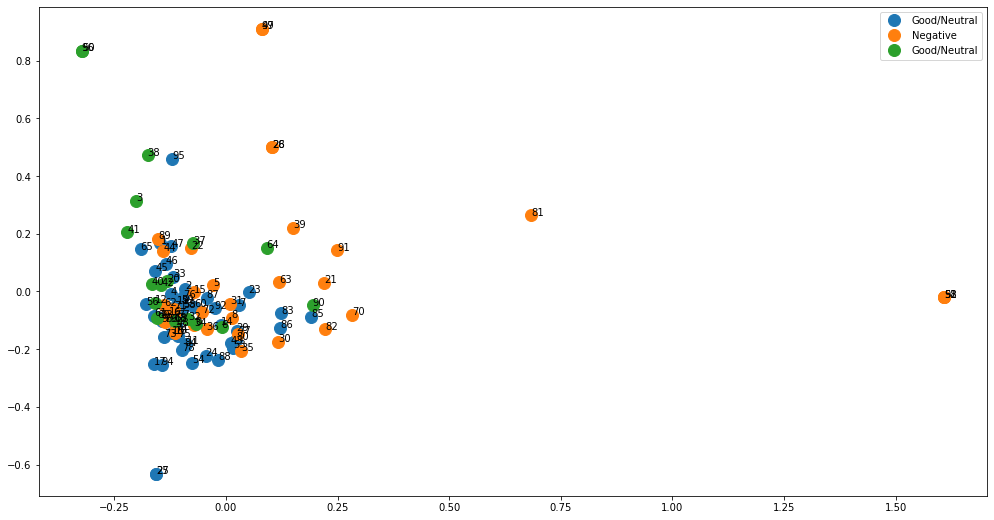

In [20]:
names = {0: 'Good/Neutral', 1: 'Negative', 2: 'Good/Neutral'}
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=names[name])

for i in range(len(xys)):
    ax.text(xys.x[i], xys.y[i], xys.index[i])

ax.legend(numpoints=1)

In [21]:
output = df[['AT_PHYSN_NPI', 'label']]

In [23]:
#output.to_csv('./output', index=False)